# Adadelta From Scratch

Adaptive gradient method is an iterative optimization method and it is an update over Adagrad. The cumulative sum of squared gradients have been replaced with exponential weighting of the past values of gradients and its squares. It does not required a *learning rate* hyperparameter to be set but it does need a parameter to how much rely on past gradients.

$\theta_{t+1,i} = \theta_{t,i} - \dfrac{\sqrt{E[(\Delta x)^2_{t,i}] + \epsilon}}{\sqrt{E[g^{2}_{t,i}] + \epsilon}}g_{t,i}$

where $i = 0,1,\dots,n$ and $\theta_{t,i}$ is $i^{th}$ parameter at time $t$. Gradient of $\theta_{t,i}$ is $g_{t,i}$ and the the term $E[(\Delta x)^2_{t,i}]$ and $E[g^{2}_{t,i}]$ are defined as

$E[(\Delta x)^2_{t,i}] = \rho E[(\Delta x)^2_{t-1,i}] + (1 - \rho)(\Delta x)^2_{t,i}$

$E[g^{2}_{t,i}] = \rho E[g^2_{t-1,i}] + (1 - \rho)g^2_{t,i}$

total $k * m$ times where $k$ equals the number of samples and $m$ being the number of *epochs* which is a hyperparameter. For number of epochs, one could also use additional criteria for stopping.

*The interpretation of the Adagrad is that it will lose velocity gradually and take smaller steps. This behavior lets users to start with greater values of learning rate ($\eta$) since it will get smaller as we propagate through the inverse direction of gradient. Also the update step sizes will be different on each parameter.*

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#learning_rate = 0.005
alpha = 0.05
eps = 1e-6
max_iter = 1000

In [3]:
def predictor(x,a,b,c,d):
    """Main model for regression task."""
    return a*x**3 + b*x**2 + c*x + d

def f(y_true,y_pred):
    """Loss function."""
    return np.sum((y_true-y_pred)**2)

# Partial derivatives (of loss function) for gradient
def dfda(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**3)

def dfdb(x,y_true,y_pred):
    return 2*(y_true-y_pred)*(x**2)

def dfdc(x,y_true,y_pred):
    return 2*(y_true-y_pred)*x

def dfdd(y_true,y_pred):
    return 2*(y_true-y_pred)

In [4]:
# create the dataset
y,x = np.histogram(np.random.randn(200))
y = np.cumsum(y)
x = x[1:]

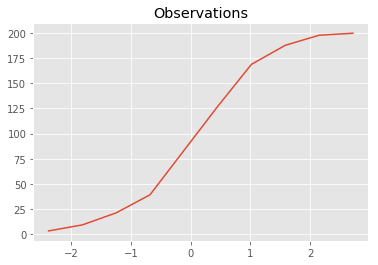

In [5]:
plt.plot(x,y)
plt.title('Observations')
plt.show()

In [6]:
# randomly initialize weights
a, b, c, d = np.random.randn(4)
print('a = {:.2f}\nb = {:.2f}\nc = {:.2f}\nd = {:.2f}'.format(a,b,c,d))

a = 0.47
b = 0.25
c = 1.05
d = -1.45


In [7]:
# train the model by applying gradient descent
errors, coefs = [], []
for i in range(max_iter): # epoch
    E_a, E_b, E_c, E_d = 0, 0, 0, 0 # exponential weighting of gradient
    ed_a, ed_b, ed_c, ed_d = 0, 0, 0, 0 # exponential weighting of gradient step
    for j in range(x.shape[0]):
        pred = predictor(x[j],a,b,c,d)
        
        g_a = dfda(x[j],y[j],pred)
        E_a = alpha*E_a + (1 - alpha)*g_a**2
        delta_a = (np.sqrt(ed_a + eps) / np.sqrt(E_a + eps)) * g_a
        ed_a = alpha*ed_a + (1 - alpha)*delta_a**2
        a = a + delta_a
        
        g_b = dfdb(x[j],y[j],pred)
        E_b = alpha*E_a + (1 - alpha)*g_b**2
        delta_b = (np.sqrt(ed_b + eps) / np.sqrt(E_b + eps)) * g_b
        ed_b = alpha*ed_b + (1 - alpha)*delta_b**2
        b = b + delta_b
        
        g_c = dfdc(x[j],y[j],pred)
        E_c = alpha*E_c + (1 - alpha)*g_c**2
        delta_c = (np.sqrt(ed_c + eps) / np.sqrt(E_c + eps)) * g_c
        ed_c = alpha*ed_c + (1 - alpha)*delta_c**2
        c = c + delta_c
        
        g_d = dfdd(y[j],pred)
        E_d = alpha*E_a + (1 - alpha)*g_d**2
        delta_d = (np.sqrt(ed_d + eps) / np.sqrt(E_d + eps)) * g_d
        ed_d = alpha*ed_d + (1 - alpha)*delta_d**2
        d = d + delta_d
        
        #delta_a = alpha*delta_a + (1 - alpha)*
        #a = a + (learning_rate / np.sqrt(E_a + eps)) * g_a
        #
        #g_b = dfdb(x[j],y[j],pred)
        #G_b = G_b + g_b**2
        #b = b + (learning_rate / np.sqrt(G_b + eps)) * g_b
        #
        #g_c = dfdc(x[j],y[j],pred)
        #G_c = G_c + g_c**2
        #c = c + (learning_rate / np.sqrt(G_c + eps)) * g_c
        #
        #g_d = dfdd(y[j],pred)
        #G_d = G_d + g_d**2
        #d = d + (learning_rate / np.sqrt(G_d + eps)) * g_d
        
    error = np.mean(np.abs(y-predictor(x,a,b,c,d)))
    if i % 10 == 0:
        print('MAE = {:.2f}'.format(error))
        #print('{:.2f}|{:.2f}|{:.2f}|{:.2f}'.format(G_a,G_b,G_c,G_d))
    errors.append(error)
    coefs.append((a,b,c,d))

MAE = 103.61
MAE = 102.93
MAE = 102.25
MAE = 101.57
MAE = 100.89
MAE = 100.21
MAE = 99.52
MAE = 98.84
MAE = 98.16
MAE = 97.47
MAE = 96.79
MAE = 96.11
MAE = 95.42
MAE = 94.73
MAE = 94.05
MAE = 93.36
MAE = 92.68
MAE = 91.99
MAE = 91.30
MAE = 90.63
MAE = 90.02
MAE = 89.41
MAE = 88.79
MAE = 88.18
MAE = 87.56
MAE = 86.95
MAE = 86.33
MAE = 85.72
MAE = 85.10
MAE = 84.48
MAE = 83.85
MAE = 83.23
MAE = 82.60
MAE = 81.97
MAE = 81.33
MAE = 80.69
MAE = 80.04
MAE = 79.39
MAE = 78.74
MAE = 78.08
MAE = 77.42
MAE = 76.76
MAE = 76.10
MAE = 75.44
MAE = 74.78
MAE = 74.12
MAE = 73.46
MAE = 72.80
MAE = 72.14
MAE = 71.48
MAE = 70.82
MAE = 70.16
MAE = 69.50
MAE = 68.85
MAE = 68.19
MAE = 67.53
MAE = 66.88
MAE = 66.22
MAE = 65.57
MAE = 64.92
MAE = 64.27
MAE = 63.62
MAE = 62.97
MAE = 62.35
MAE = 61.73
MAE = 61.11
MAE = 60.50
MAE = 59.89
MAE = 59.29
MAE = 58.70
MAE = 58.13
MAE = 57.59
MAE = 57.46
MAE = 57.40
MAE = 57.35
MAE = 57.30
MAE = 57.25
MAE = 57.20
MAE = 57.16
MAE = 57.12
MAE = 57.07
MAE = 57.03
MAE = 57.0

In [8]:
# parameters
print('a = {:.2f}\nb = {:.2f}\nc = {:.2f}\nd = {:.2f}'.format(a,b,c,d))

a = 5.26
b = 15.17
c = 7.51
d = 10.18


In [9]:
errors = np.asarray(errors)
coefs = np.asarray(coefs)

In [10]:
pred = predictor(x,a,b,c,d)

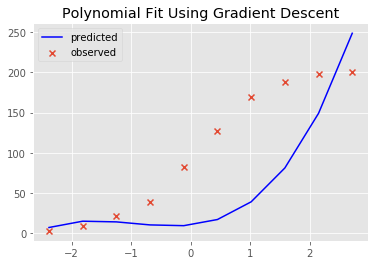

In [11]:
plt.scatter(x,y,label='observed',marker='x')
plt.plot(x,pred,label='predicted',c='blue')
plt.legend()
plt.title('Polynomial Fit Using Gradient Descent')
plt.show()

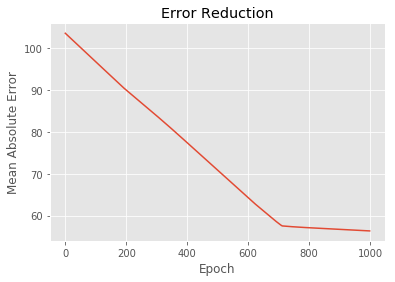

In [12]:
plt.plot(errors)
plt.title('Error Reduction')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.show()

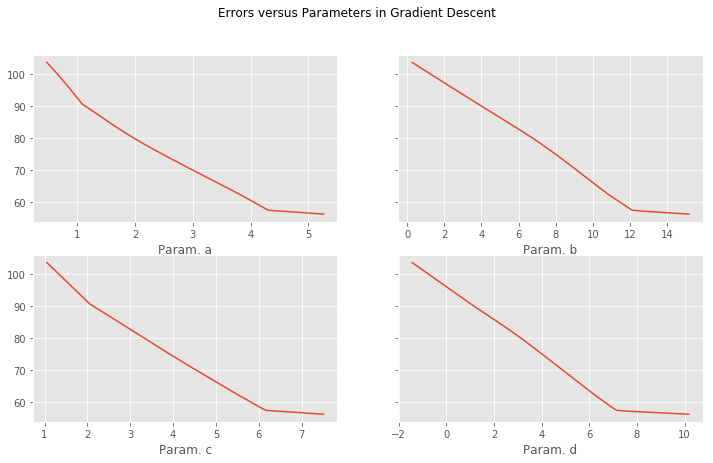

In [13]:
fig, axs = plt.subplots(2, 2,figsize=(12,6.75),sharey=True)
fig.suptitle('Errors versus Parameters in Gradient Descent')
axs[0,0].plot(coefs[:,0],errors)
axs[0,0].set_xlabel('Param. a')
axs[0,1].plot(coefs[:,1],errors)
axs[0,1].set_xlabel('Param. b')
axs[1,0].plot(coefs[:,2],errors)
axs[1,0].set_xlabel('Param. c')
axs[1,1].plot(coefs[:,3],errors)
axs[1,1].set_xlabel('Param. d')
plt.show()

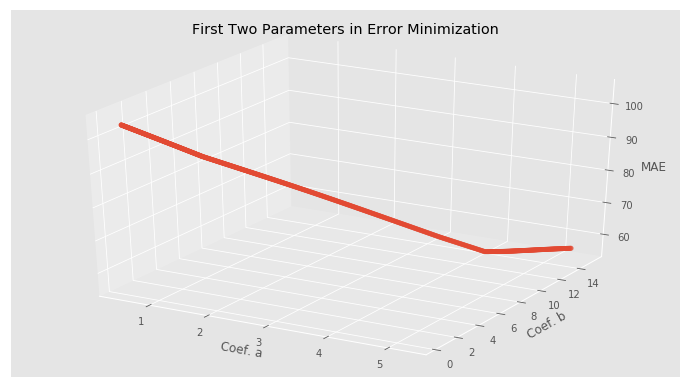

In [14]:
# error reduction path in three dimensions
fig = plt.figure(figsize=(12,6.75))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coefs[:,0], coefs[:,1], errors)
plt.title('First Two Parameters in Error Minimization')
ax.set_xlabel('Coef. a')
ax.set_ylabel('Coef. b')
ax.set_zlabel('MAE')
plt.show()

In [15]:
# contour limits
m = 4
n_res = 300
XX, YY = np.meshgrid(np.linspace(-m*a if -m*a < np.min(coefs[:,0])*2 else np.min(coefs[:,0])*2,
                                 m*a if m*a > np.max(coefs[:,0])*2 else np.max(coefs[:,0])*2, n_res),
                     np.linspace(-m*b if -m*b < np.min(coefs[:,1])*2 else np.min(coefs[:,1])*2,
                                 m*b if m*b > np.max(coefs[:,1])*2 else np.max(coefs[:,1])*2, n_res))
Z = np.asarray([f(y,predictor(x,aa,bb,c,d)) for aa,bb in zip(XX.ravel(), YY.ravel())])
Z = Z.reshape((n_res,n_res))

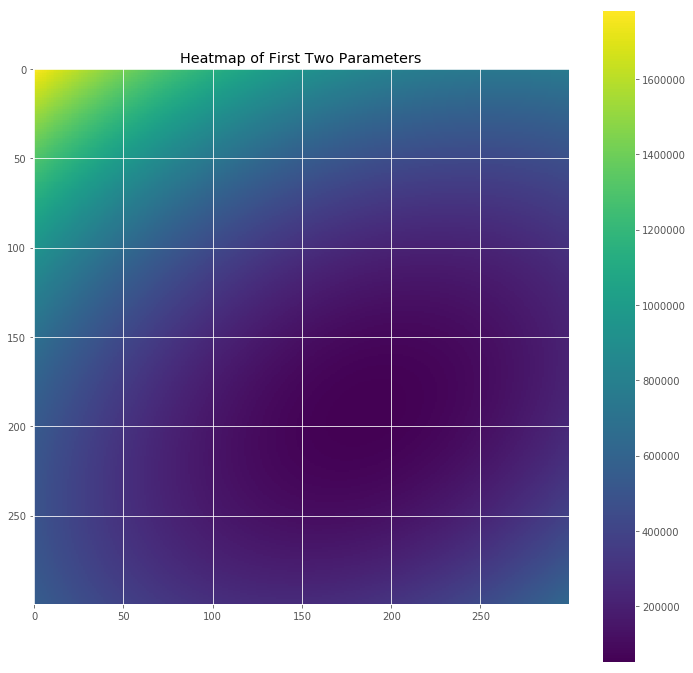

In [16]:
# Colorcode shows the error
fig = plt.figure(figsize=(12,12))
plt.imshow(Z, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of First Two Parameters')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


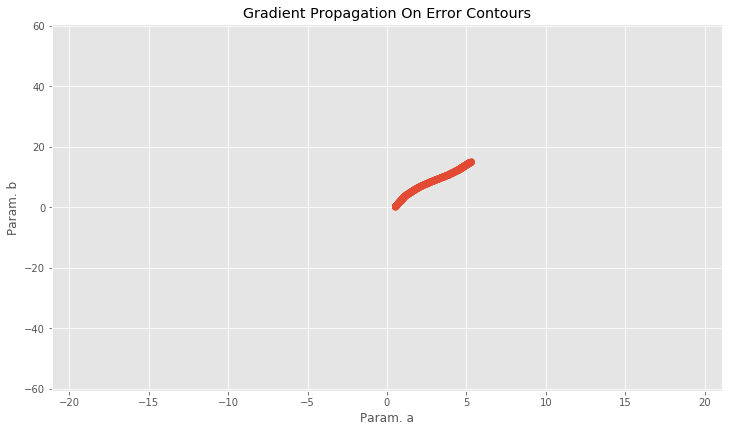

In [17]:
# contour plot parameters
fig = plt.figure(figsize=(12,6.75))
plt.contour(XX, YY, Z,levels=12)
plt.scatter(coefs[:, 0], coefs[:, 1])
plt.title('Gradient Propagation On Error Contours')
plt.xlabel('Param. a')
plt.ylabel('Param. b')
plt.show()